# Leer archivos almacenados

In [1]:
#usefull
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#netCDF4
import netCDF4 as nc
import xarray as xr
#GIS
import geopandas
import rasterio as rio
#leer carpetas
import os
#eliminar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

In [2]:
# folder path
dir_fold = 'C:/Users/carlo/OneDrive - Universidad Nacional de Colombia/Semestre 11/MachineLearning/DownScaling/VariablesListas'

# list to store Folders
folder = []

# Iterate directory
for path in os.listdir(dir_fold):
    # check if current path is a file
    #if os.path.isfile(os.path.join(dir_path, path)):
        folder.append(path)

folder

['Coord_Vector.csv',
 'Elevacion_Vector.csv',
 'HumedadDiaria_Vector.csv',
 'PptEra5_Vector.csv',
 'PptSIATA_Vector.csv',
 'PresionDiaria_Vector.csv',
 'TemperaturaDiaria_Vector.csv']

In [3]:
orden = [3,2,6,5,1,0,4]

df = pd.DataFrame()

for i in orden:
    df_i = pd.read_csv(dir_fold+'/'+folder[i])
    df = pd.concat([df, df_i], axis=1)

df 

,Ppt_ERA5,Humedad,Temperatura,Presion,Elevación,CoorX,CoorY,Ppt_SIATA
0,5.475980,33.672039,13.844298,802.956631,1781.0,-75.28,6.55,43.023724
1,5.475980,33.672039,14.142333,803.052634,1624.0,-75.27,6.55,38.443913
2,5.475980,33.672039,14.421129,803.128664,1308.0,-75.26,6.55,28.653738
3,5.475980,33.672039,14.675893,803.188920,1188.0,-75.25,6.55,14.130409
4,5.475980,33.672039,14.902739,803.236504,1131.0,-75.24,6.55,11.153187
...,...,...,...,...,...,...,...,...
120043,3.823129,49.970291,18.134375,818.959508,2217.0,-75.62,6.01,2.227224
120044,3.823129,49.292494,18.134375,818.959508,2404.0,-75.61,6.01,1.340664
120045,3.823129,48.575439,18.134375,818.959508,2359.0,-75.62,6.00,9.622210
120046,3.823129,48.017766,18.134375,818.959508,2595.0,-75.61,6.00,2.705959


In [5]:
X = df.drop(['Ppt_SIATA'], axis=1)
y = df['Ppt_SIATA']

# 05: Análisis Exploratorio de Datos (EDA)

Luego de realizar la limpieza y ajustes sobre los datos de entrada, se debe seleccionar las mejores variables predictoras, que conformarán los *features* del modelo.

Es importante tener en cuenta en esta fase que existen diferentes métodos estadísticos que ayudan a identificar dichas variables, sin embargo el mejor método es una buena comprensión del problema y de las variables a utilizar.

A continuación se describen inicialmente los métodos para conocer cada una de las variables, y su relación con las demás variables. Y finalmente se presentan métodos para identificar de forma automática las mejores variables predictoras. Recuerde que dichos métodos no son mas que herramientas estadísticas que le pueden proporcionar informacion importante, pero la mejor selección la debe hacer el usuario considerando toda la información obtenida de las diferentes variables.

## Importar librerias

Importar los ficheros necesarios

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from osgeo import gdal

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## Análisis univariado

Para generar el histograma de una sola variable se puede utilizar el siguiente código con el método *hist*.:

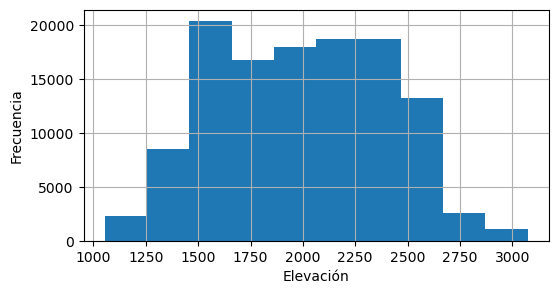

In [13]:
llaves = X.keys()

n = 4
temp = []

plt.close()
plt.figure(figsize=(6,3))
X[llaves[n]].hist()
#plt.title('Histograma de Pendiente')
plt.xlabel(llaves[n])
plt.ylabel('Frecuencia');

# plt.boxplot(X_hum[0]);

Con la librearía *Seaborn* se puede generar el *displot* de las diferentes variables.

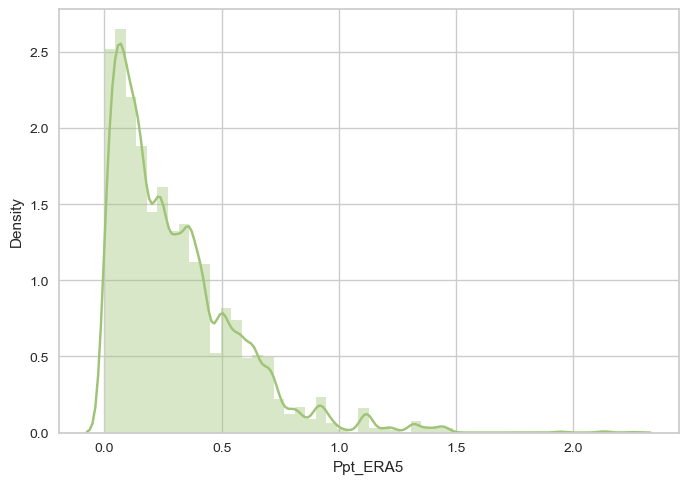

In [417]:
sns.distplot(X[llaves[0]],color='g');

Para generar el histograma de las variables continuas.

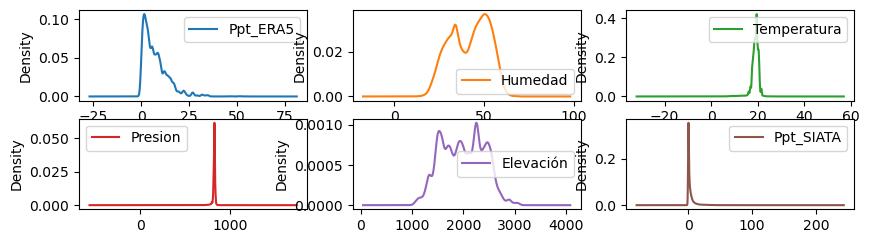

In [34]:
X_cont=X.loc[:,llaves[0]:llaves[4]]
X_cont=pd.concat([X_cont, y], axis=1)

X_cont.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10, 4));

Para generar el diagrama de caja de cada variable:

Ppt_ERA5


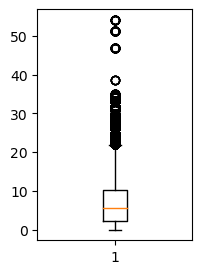

In [49]:
n = 0

X_i=X[llaves[n]]
print(llaves[n])

plt.close()
plt.figure(figsize=(2,3))
plt.boxplot(X_i);

El diagrama tipo Violin brinda información similar al *boxplot*, sin embargo en algunos casos puede brindar información adicional sobre la distribución de los datos.

Humedad


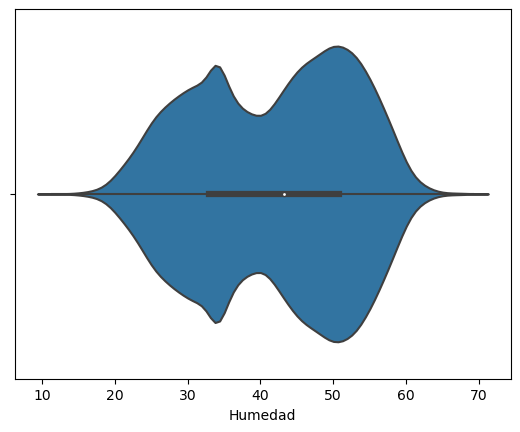

In [55]:
llaves_df = df.keys()

n = 1
print(llaves_df[n])
sns.violinplot(x=llaves_df[n], data=df);

## Análisis Bivariado

El análisis bivariado permite identificar asociación o correlación entre diferentes variables. Se utilizan las siguientes herramientas.

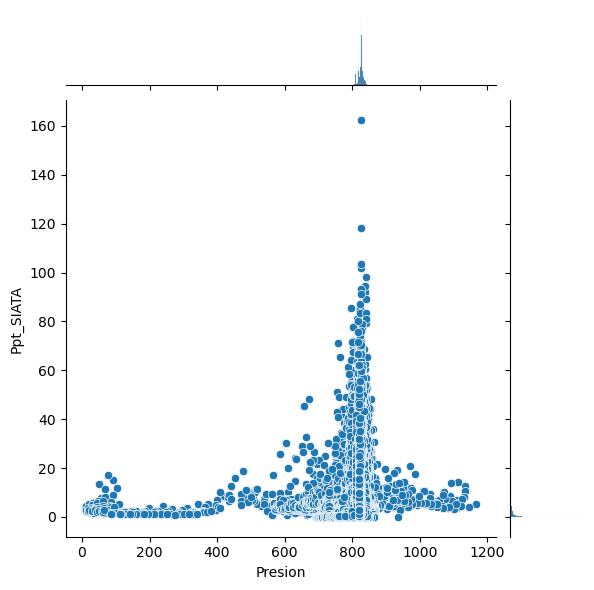

In [60]:
n1 = 3
n2 = 7
sns.jointplot(x=llaves_df[n1], y=llaves_df[n2], data=df, kind='scatter');

## Análisis Multivariado

El análisis multivariado permite analizar tres o mas variables.

Una etapa fundamental en el análisis multivariado de los datos es evaluar la correlación entre ellos. Para lo cual existen diferentes herramientas. La libraría *Seaborn* también tiene una función para plotear la matriz, donde a diferencia de las demas marca el valor de la correlación en cada celda.

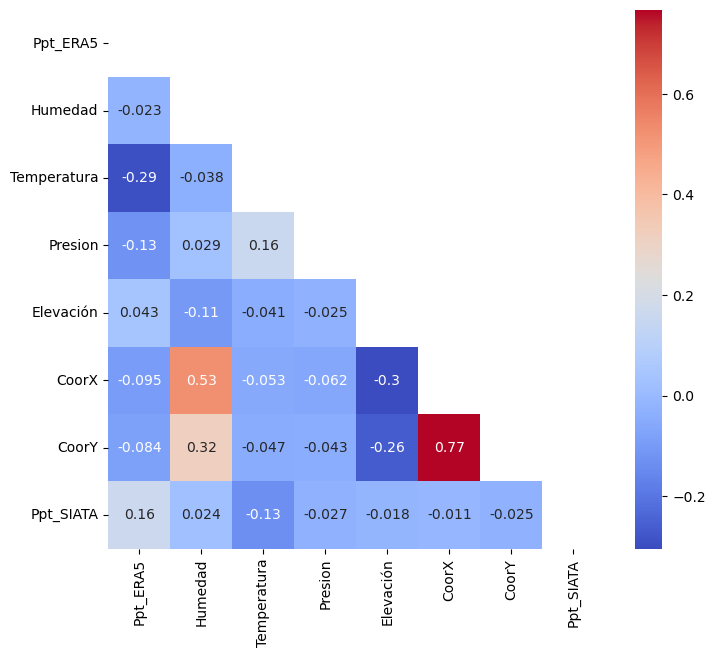

In [62]:
plt.figure(figsize=(8,7))
cor = df.corr()
# creating mask
mask = np.triu(np.ones_like(cor))
#plot triangulo de correlación
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm, mask=mask)
plt.show()

# 08: Validación Cruzada

## *train-test-split*

Este algortimo es muy rapido y es ideal para grandes bases de datos en donde los datos de entrenamiento y validacion son lo suficientemente represetativos del problema. Debido a que es rapido se puede utilizar cona algoritmos complejos y lento para el entrenamiento. Una falencia del método es que puede generar alta varianza debido a grandes diferencias entre los datos de entrenamiento y validación.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.simplefilter("ignore")

Un agumento importante de este algoritmo es *random_state*, el cual permite obtener con el mismo numero la misma partición de datos aleatoria, para asegurar resultados similares. A continuacion se va a generar tres particiones, donde dos de ellas tiene el mismo valor semilla (1).

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=1)
X2_train,X2_test, y2_train,y2_test = train_test_split(X,y, random_state=1)
X3_train,X3_test, y3_train,y3_test = train_test_split(X,y, random_state=2)

In [65]:
print('Dimensiones de la matriz para entrenar:',X_train.shape)
print('Dimensiones del vector para entrenar:',y_train.shape)
print('Dimensiones de la matriz para validar:',X_test.shape)
print('Dimensiones del vector para validar:',y_test.shape)

Dimensiones de la matriz para entrenar: (96038, 7)
Dimensiones del vector para entrenar: (96038,)
Dimensiones de la matriz para validar: (24010, 7)
Dimensiones del vector para validar: (24010,)


Por defecto la función *train_test_split* divide la base de datos en 75% para entrenamiento y 25% para validación. pero cone l argumento *test_size* se puede especificar otro valor para el tamno de lso datso de validacion entre 0 y 1.

In [66]:
np.array_equal(X_train,X2_train)

False

Como se puede observar para los conjuntos con valor 1 las bases de datos aleatorias seleccioandas no son iguales, igual que para el caso en el que se comapra con la seleccion aleatoria pero con semilla 2.

In [67]:
np.array_equal(X_train,X3_train)

False

A continuacion se puede implementar el modelo, en este caso Lasso, entrenarlo directamente y preguntar por el *score*.

In [68]:
LinearRegression().fit(X_train,y_train).score(X_test,y_test)

0.03675599881204772

### *K-fold* (Regresión)

El método de *K-fold Cross Validation* permite obtener el desempeño del algoritmo con menor varianza que un particion sencilla de *train-test set split*. Este metodo divide lso datos en un número de K subconjuntos (k = 5 ó k = 10). Cada partición es denominada un *fold*. El algoritmo es entonces entrenado con K-1 subconjuntos y un subconjunto es utilizado para validar. Esto es k veces repetido por lo que se obtienen k valores de *score*. El algoritmo es por lo tanto entrenado y evaluado múltiples veces. Como resultado de esta función no se obtiene un modelo, ya que varios modelos son creados internamente, el propósito es sólamente evaluar que tan bien un algoritmo determinado va a generalizar con otros datos diferentes al entrenamiento.

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [70]:
kfold = KFold(n_splits=7, shuffle= True,random_state=1)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.0350705  0.03585183 0.03418779 0.03966721 0.03785959 0.03264304
 0.03798067]
0.03618008977795343
0.0022691026671940295


A continuación se presenta la función *cross_validate*, la cual difiere de *cross_val_score* ya que permite definir múltiples métricas para estimar el ajuste, adicionalmente las salidas de la función son diferentes como se observa a continuación. Por defecto la función *cross_val_score* genera 3 particiones.

In [71]:
from sklearn.model_selection import cross_validate

In [72]:
results_ridge = cross_validate(Ridge(),X,y,return_train_score=True,cv=5)
results_ridge

{'fit_time': array([0.01601529, 0.01101041, 0.01000881, 0.01301122, 0.01101184]),
 'score_time': array([0.00100017, 0.00200105, 0.00200248, 0.00200129, 0.00199986]),
 'test_score': array([-0.21102542, -0.01902312,  0.02724973,  0.04417953, -0.03037297]),
 'train_score': array([0.04677145, 0.05274155, 0.03725791, 0.03425521, 0.0267955 ])}

In [73]:
test_scores = results_ridge['test_score']
train_scores = results_ridge['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

Train scores: 0.03956432387486224
Test scores: -0.03779845039610532


In [74]:
results_lasso = cross_validate(Lasso(),X,y,return_train_score=True,cv=5)
results_lasso

{'fit_time': array([0.01426768, 0.01501393, 0.01501346, 0.01601386, 0.01601458]),
 'score_time': array([0.00200129, 0.00200176, 0.002002  , 0.002002  , 0.00200176]),
 'test_score': array([ 0.00825475, -0.02659716,  0.0125467 ,  0.03208917, -0.04766547]),
 'train_score': array([0.02508211, 0.04591701, 0.02907032, 0.02668315, 0.02006178])}

In [75]:
test_scores = results_lasso['test_score']
train_scores = results_lasso['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

Train scores: 0.02936287500352077
Test scores: -0.004274401808498585


In [76]:
results_linear = cross_validate(LinearRegression(),X,y,return_train_score=True,cv=5)
results_linear

{'fit_time': array([0.01901627, 0.02402115, 0.0240221 , 0.02502346, 0.02502227]),
 'score_time': array([0.00200152, 0.00200152, 0.00200176, 0.00200152, 0.002002  ]),
 'test_score': array([-0.21103341, -0.01902787,  0.02724803,  0.04418091, -0.03037224]),
 'train_score': array([0.04677145, 0.05274155, 0.03725791, 0.03425521, 0.0267955 ])}

In [77]:
test_scores = results_linear['test_score']
train_scores = results_linear['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

Train scores: 0.039564325397240155
Test scores: -0.03780091493827602


### ShuffleSplit

Otra variación de *k-fold* es generar una partición aleatoria como *train-test-split*, pero repite el proceso de partición y evaluación múltiples veces como *K-fold*.

In [79]:
from sklearn.model_selection import ShuffleSplit

In [80]:
kfold = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

0.0363003935788031
0.0013509118375956077


# 09: Selección de hiperparámetros (*hyperparameter optimization*)

## The Normal Equation vs Gradient Descent

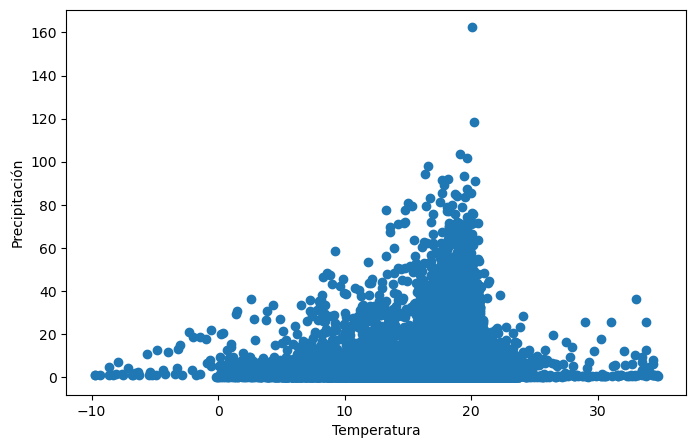

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# # Generate a regression problem
# X, y = make_regression(
#     n_samples=100,
#     n_features=2,
#     n_informative=2,
#     noise = 10,
#     random_state=25
#     )

s = 2
# Visualize feature at index 1 vs target
plt.subplots(figsize=(8, 5))
plt.scatter(X[X.keys()[s]], y, marker='o')
plt.xlabel(X.keys()[s])
plt.ylabel('Precipitación')
plt.show()

### The normal equation from scratch

In [83]:
# adds x0 = 1 to each instance
X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)
# calculate normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# best values for theta
intercept, *coef = theta_best
print(f"Intercept: {intercept}\n\
Coefficients: {coef}")

Intercept: 3.386887027772362
Coefficients: [0.12316426024594443, 0.018336842198117154, -0.30059350060410506, 0.00020801204371704066, -0.0004976660337358166, -0.19171842571353154, -1.6071652789157145]


### The normal equation using Scikit-learn

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(f"Intercept: {lr.intercept_}\n\
Coefficients: {lr.coef_}")

Intercept: 3.386883761050932
Coefficients: [ 1.23164260e-01  1.83368424e-02 -3.00593501e-01  2.08012035e-04
 -4.97666035e-04 -1.91718467e-01 -1.60716525e+00]


Los modelos de *machine learning* son parametrizados por lo que los resultados están en función de dichos valores. Los parámetros del algoritmo y que no dependen de los datos son denominados hiperparámetros, mientras que el término parámetros es exclusivo de los coeficientes que encuentra el modelo y dependen de los datos. 

## Curva de validación con Sklearn

La Curva de Vallidación visualiza la métrica del desempeño del modelo sobre un rango de valores para algún hiperparámetro. Es por lo tanto utilizado para seleccionar los hiperparámetros que maximicen el desempeño del modelo.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

Como algoritmo se utilizará el vecino mas cercano. Inicialmente se ejecutará el modelo para un hiperparámetro que determina el número de vecinos a utilizar. Inicialmente como ejemplo se utiliza un valor de K=10.

In [86]:
results=cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)
results

{'fit_time': array([0.23421192, 0.20518661, 0.23395801, 0.20718718, 0.2081902 ]),
 'score_time': array([0.2872622 , 0.31228423, 0.31228495, 0.28526425, 0.25523067]),
 'test_score': array([-0.10932987, -0.05327908, -0.16390886, -0.06865731, -0.20192858])}

In [87]:
results['test_score'].mean()

-0.11942074063962242

Para seleccionar el valor de K que optimice el algoritmo, primero definiremos el rango de K en el cual evaluaremos la función. Se utilizarán valores pares de 2 hasta 100.

In [88]:
k = np.arange(2,26,2)
k

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

Y se llama la función *validation_curve* en el rango de valores K definido:

In [89]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name='n_neighbors', param_range=k, cv=6)

In [90]:
print(test_scores)

[[-4.59554690e-01 -3.21785586e-01 -4.79312237e-01 -7.43140380e-01
  -4.02585076e-01 -7.00550632e-01]
 [-2.67213923e-01 -1.46427839e-01 -2.45806943e-01 -3.66337131e-01
  -1.91368077e-01 -3.32279559e-01]
 [-1.98876508e-01 -8.58910685e-02 -1.66524574e-01 -2.50445236e-01
  -1.42566999e-01 -2.17809986e-01]
 [-1.57403819e-01 -6.06296225e-02 -1.28304815e-01 -1.76715264e-01
  -1.07216020e-01 -1.70531465e-01]
 [-1.33384013e-01 -4.20124827e-02 -1.03823271e-01 -1.38631125e-01
  -7.93566444e-02 -1.35764027e-01]
 [-1.15973139e-01 -4.09081739e-02 -8.69533243e-02 -1.15260318e-01
  -5.64771404e-02 -1.08793415e-01]
 [-1.01707820e-01 -3.83150320e-02 -7.64106320e-02 -9.91247517e-02
  -3.73057299e-02 -9.41910632e-02]
 [-9.20925037e-02 -3.69415175e-02 -6.92624681e-02 -9.09796664e-02
  -2.09270437e-02 -8.44360947e-02]
 [-8.29397378e-02 -3.52400210e-02 -6.24166925e-02 -7.79947231e-02
  -1.05175738e-02 -7.69450199e-02]
 [-7.56207350e-02 -3.34482198e-02 -5.74806655e-02 -6.52826744e-02
  -5.15735790e-03 -7.1715

Como se obtienen 5 valores de *score* por cada valor de K, por lo cual se debe promediar dicho valor en las 50 valores de k para los datos de entrenamiento y para los datos de validación.

In [91]:
#np.mean(test_scores,axis=1)
np.mean(train_scores,axis=1)

array([0.57779177, 0.34248964, 0.26124573, 0.21462624, 0.18657292,
       0.16671794, 0.15169018, 0.14062281, 0.13195342, 0.12435369,
       0.11798815, 0.11236613])

In [92]:
np.mean(test_scores,axis=1)

array([-0.51782143, -0.25823891, -0.17701906, -0.13346683, -0.10549526,
       -0.08739425, -0.07450917, -0.06577322, -0.05767563, -0.05145084,
       -0.04703869, -0.0439136 ])

Y se grafica la Curva de Validación.

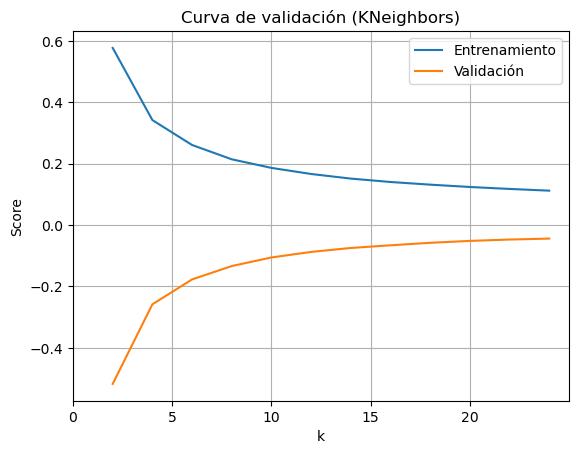

In [93]:
plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(k,np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(k,np.mean(test_scores,axis=1),label="Validación")
#plt.ylim(0, 1)
plt.xlim(0, 25)
plt.xticks(np.arange(0,25,5))
plt.legend(loc="best")
plt.grid(True);

Realmente no se encuentra un buen valor de 'k', dado que para valores pequeños el Score de entrenamiento es alto pero el de Validación muy bajo. Mientras que para 'k' mayores el Score de entrenamiento disminuye, pero se disminulle la brecha con el de validación. Aún así se optaría por un valor 'k' cercano a 10

A continuacion se presenta otro ejemplo de Curva de Validación con el método de *Support Vector machine* para clasificación con el hiperparámetro $\gamma$.

## Curva de validación con yellowbrick

In [98]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.datasets import load_energy

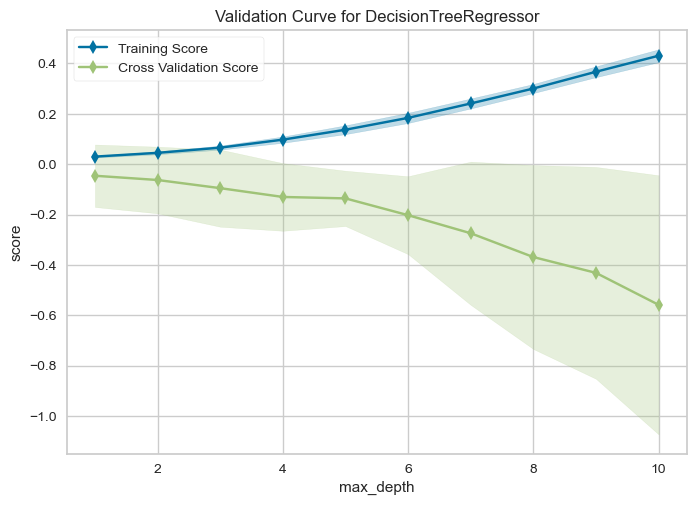

In [99]:
from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=10, scoring="r2")
viz.fit(X, y)
viz.show();

Tampoco se obtienen buenos resultados.

# Funciones para selección de hiperparámetros

La librearía de Sklearn tiene dos métodos para seleccionar automáticamente los mejores hiperparámetros del modelo:

- Grid Search Parameter Tuning.
- Random Search Parameter Tuning.

## Grid Search
El *Grid search* es un método para ajustar los parámetros que consiste en crear y evaluar un modelo metódicamente  para cada combinación de hiperparámetros especificados en la grilla de búsqueda definida.

In [100]:
from sklearn.model_selection import GridSearchCV

En el siguiente ejemplo se utilizará la misma base de datos del ejemplo anterior.

In [101]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.004274401808498585
1.0


Los resultados señalan que el mejor parámetro alpha es 1 para obtener un *score* de -0.004, lo que señala un grave problema de *bias* de nuestro modelo.

## Random Search
El método de *Random search* selecciona aleatoriamente valores del hiperparámetro de una distribución uniforme por un número especificado de iteracciones. Un modelo es construido y evaluado para cada combinación de parámetros seleccionados.

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [103]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-0.03779847780528307
0.9888610889064947


Los resultados arrojan que el mejor valor del hiperparámetro es 0.98 para un desempeño de -0.03.

# 10: Métrica para evaluación

## Métrica para metodos de regresión

### Mean Absolute Error
El error medio absoluto (MAE) es la suma de las diferencias absolutas entre las predicciones y las observaciones. Da una idea de que tan equivocado puede estar el modelo, define la magnitud pero no la direccion, (*over* o *under fitting*).

In [107]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
print(results.mean())
print(results.std())

-3.1581708402345363
0.026373860341661313


### Mean Squared Error
El error medio cuadrático (MSE) es mas como el error medio absoluto ya qu da una idea de la magnitud del error en las unidades del problema, tambien es denominado *Root Mean Squared Error -RMSE-*.

In [108]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-33.5980520676702
1.2739226134510038


### R2 Metric
Finalmente el R2 (R cuadrado) provee una buena indicación del la bondad del ajuste de las predicciones a las observaciones, y varía entre 0 y 1.

In [109]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

0.03619768743975915
0.0010891917143577953


# 12: Clustering

*Clustering* corresponde a un modelo no supervisado, por lo tanto no existen *labels* en la base de datos, y se refiere a partir los datos en grupos mas pequeños denominados *cluster*. El objetivo es que la partición de los datos sea de tal forma que los datos de cada *cluster* sean muy similares entre si y muy diferentes a los datos de los otros *cluster*.

Inicialmente se importan las librerías generales a utilizar:

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## K-Means clustering

Este método corresponde a uno de los mas simples y mas utilizados. Lo que hace es tratar de encontrar centros de *cluster* que sean representativos de ciertas regiones entre los datos.  Esencialmente el algoritmo consta de dos pasos: (i) asignar a cada dato el centro del *cluster* mas cercano, y (ii) y ajustar el centro del *cluster* al valor medio en términos de distancia de todos los datos asignados a dicho *cluster*. El algoritmo finaliza cuando los centros de los *cluster* no cambian significativamente entre cada iteración.

Para iniciar vamos a generar algunos puntos aleatorios utilizando la función *make_blobs*.

Los puntos generados se distribuyen de la siguiente manera. Se observa que existen tres *cluster* que agrupan los datos.

In [111]:
X1 = X.iloc[:10000]

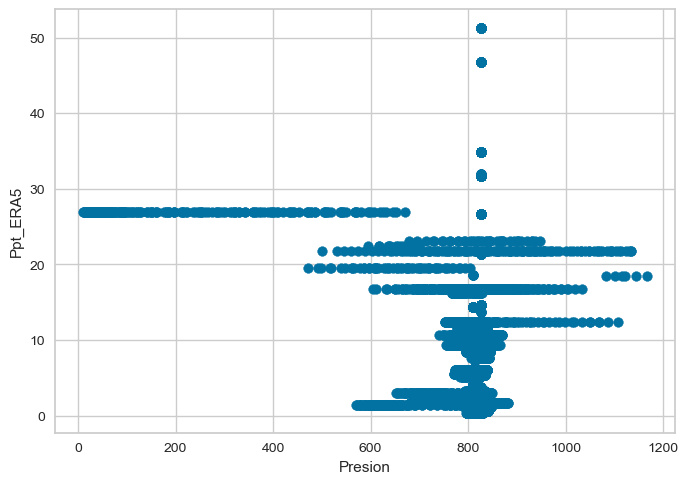

In [121]:
#X,y=make_blobs(random_state=1)
llaves = X1.keys()
n1 = 3
n2 = 0
plt.scatter(X1[llaves[n1]],X1[llaves[n2]])
plt.xlabel(llaves[n1])
plt.ylabel(llaves[n2]);

### KMeans

El método *k-means* se basa en maximizar la distancia entre los puntso centrales de los cluster y simultaneamente minimizar la varianza entre los cluster. Como limitante tiene que previamente se debe establecer el numero *k*. Se implementa de la siguiente manera:

In [122]:
km = KMeans(n_clusters=3)
model=km.fit(X1)
y_kmeans=model.fit_predict(X1)

In [123]:
y_kmeans

array([1, 0, 0, ..., 0, 0, 1])

Para conocer los centros de los *clusters* y los datos asignados a cada uno, se utiliza:

In [124]:
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[   9.00743547   39.70301727   18.34661547  797.61011688 1509.6109215
   -75.45387217    6.36306236]
 [   9.68956821   40.37315697   18.24483835  805.81298807 1957.83488896
   -75.52539105    6.27492115]
 [  10.02665983   38.8919802    17.48279456  807.93818721 2425.4972752
   -75.52250136    6.29784741]]
número de datos asignados a cada centroide:
[3223 3107 3670]


Para graficar los datos de acuerdo con el *cluster* asignado a cada dato se utiliza:

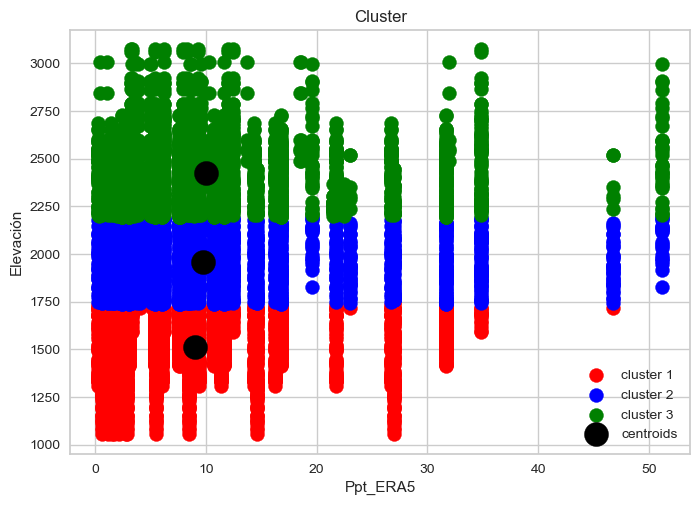

In [141]:
fx = 0
fy = 4

X2=np.array(X1)
plt.scatter(X2[y_kmeans==0,fx],X2[y_kmeans==0,fy],s=100,c='red',label='cluster 1')
plt.scatter(X2[y_kmeans==1,fx],X2[y_kmeans==1,fy],s=100,c='blue',label='cluster 2')
plt.scatter(X2[y_kmeans==2,fx],X2[y_kmeans==2,fy],s=100,c='green',label='cluster 3')
#plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='yellow',label='cluster 4')
plt.scatter(model.cluster_centers_[:,fx],model.cluster_centers_[:,fy],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel(llaves[fx])
plt.ylabel(llaves[fy])
plt.legend();

## Hierarchical clustering

### Matriz de Distancias

In [142]:
from scipy.spatial import distance_matrix
dd1=pd.DataFrame(distance_matrix(X2,X2,p=1))  ##distancia de Manhattan
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,157.404038,473.768865,594.093885,651.378315,673.621548,728.823432,167.213608,68.655430,25.212655,...,77.093501,164.194021,295.241982,528.253009,509.128681,457.779054,322.130872,246.137987,124.781914,65.073663
1,157.404038,0.000000,316.364827,436.689847,493.974277,516.217510,571.419394,324.617646,226.059468,132.554673,...,233.709463,76.809982,137.857944,370.868971,351.744643,300.395016,164.746834,88.753949,123.397876,181.689625
2,473.768865,316.364827,0.000000,120.325020,177.609451,199.852683,255.054567,640.982473,542.424295,448.919500,...,549.364636,392.465156,263.513118,54.524144,53.399816,106.050189,242.402007,318.409122,439.053050,497.344798
3,594.093885,436.689847,120.325020,0.000000,57.284431,79.527663,134.729547,761.307493,662.749315,569.244520,...,669.059616,512.160136,383.208098,152.219124,173.094796,225.745169,362.096987,438.104102,558.748030,617.039778
4,651.378315,493.974277,177.609451,57.284431,0.000000,22.243232,77.445117,818.591923,720.033745,626.528950,...,725.795185,568.895705,439.943667,208.954694,229.830366,282.480739,418.832556,494.839671,615.483599,673.775347


In [143]:
dd2=pd.DataFrame(distance_matrix(X2,X2,p=2)) #distancia Euclidiana
dd2.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000000,157.000313,473.000383,593.000629,650.000923,672.001248,727.001467,166.002116,68.001497,25.000610,...,45.515865,124.449921,253.278629,484.711245,464.783731,412.918817,277.400058,201.929676,83.668853,33.581071
1,157.000313,0.000000,316.000132,436.000348,493.000622,515.000937,570.001156,323.001978,225.001203,132.000542,...,197.386006,42.700400,98.313808,328.043491,308.174395,256.471226,122.189739,51.177477,82.692302,139.610988
2,473.000383,316.000132,0.000000,120.000286,177.000689,199.001209,254.001454,639.001544,541.000943,448.000465,...,512.527733,351.844803,222.434363,28.283793,28.264785,66.850056,198.931577,274.398568,394.949942,453.791436
3,593.000629,436.000348,120.000286,0.000000,57.000472,79.001180,134.001333,759.001806,661.001206,568.000709,...,632.424623,471.625903,341.925829,112.054449,131.738849,183.044136,318.198049,393.968019,514.724861,573.622605
4,650.000923,493.000622,177.000689,57.000472,0.000000,22.000907,77.000868,816.002163,718.001541,625.001009,...,689.387280,528.555494,398.789656,168.012252,187.901681,239.551816,375.011887,450.842230,571.649892,630.563882


In [144]:
dd8=pd.DataFrame(distance_matrix(X2,X2,p=8)) #distancia de Minkowski
dd8.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,157.0,473.0,593.0,650.0,672.0,727.0,166.0,68.0,25.0,...,39.013302,122.000007,252.000000,484.000000,464.000000,412.000000,276.000000,200.000001,79.000538,23.418495
1,157.0,0.0,316.0,436.0,493.0,515.0,570.0,323.0,225.0,132.0,...,196.000000,35.041827,95.000058,327.000000,307.000000,255.000000,119.000034,43.042526,78.000587,137.000009
2,473.0,316.0,0.0,120.0,177.0,199.0,254.0,639.0,541.0,448.0,...,512.000000,351.000000,221.000000,21.606065,22.466556,61.003242,197.000001,273.000000,394.000000,453.000000
3,593.0,436.0,120.0,0.0,57.0,79.0,134.0,759.0,661.0,568.0,...,632.000000,471.000000,341.000000,109.000032,129.000014,181.000002,317.000000,393.000000,514.000000,573.000000
4,650.0,493.0,177.0,57.0,0.0,22.0,77.0,816.0,718.0,625.0,...,689.000000,528.000000,398.000000,166.000002,186.000001,238.000000,374.000000,450.000000,571.000000,630.000000


Qué diferencias encuentra entre las diferentes distancias?

Aparentemente a potencias más grandes mediante las cuales sean calculadas las distancias, estas se reducen

### Dendrograma

Una herramienta muy utilizada es el dendrograma, que despliega la relación de agrupamiento entre todos los datos. Cualquier línea horizontal que corte las líneas de color representa el número de *cluster* que se definen de acuerdo con la distancia entre ellos.  
Utilizando entonces la matriz Z de los enlaces creados se crea el dendrograma. Se puede definir el umbral para el color como un porcentaje de la distancia mayor (83), tambien truncarlo con los ultimos cluster formados (6). En cada *leaf* señala el numero de observaciones que tiene en cada cluster.

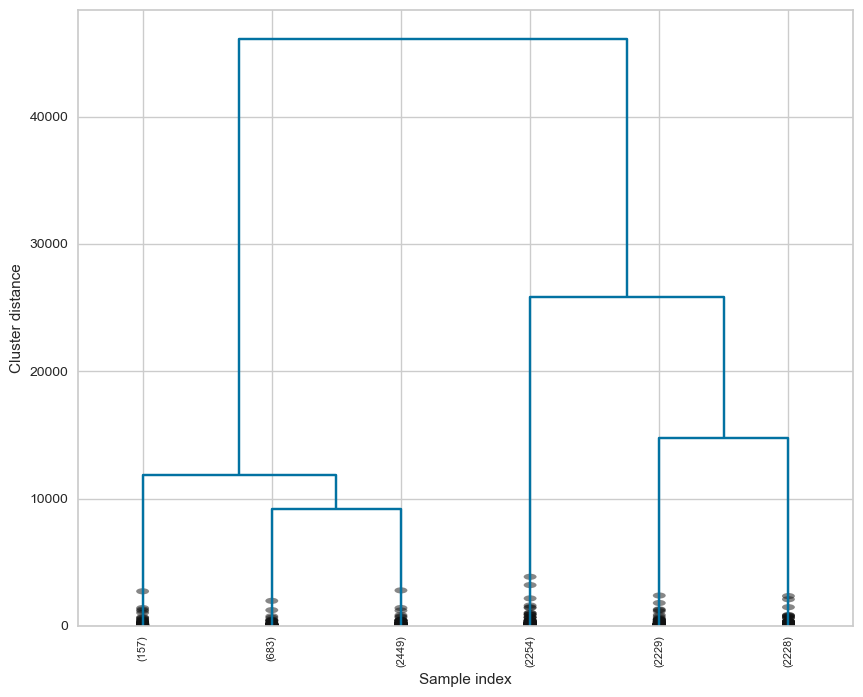

In [149]:
plt.figure(figsize=(10,8))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.show()

In [150]:
Z[-6:,]

array([[19987.        , 19988.        ,  7365.14689368,  2254.        ],
       [19986.        , 19991.        ,  9220.82671175,  3132.        ],
       [19992.        , 19994.        , 11844.85547664,  3289.        ],
       [19989.        , 19990.        , 14758.44118309,  4457.        ],
       [19993.        , 19996.        , 25865.65309583,  6711.        ],
       [19995.        , 19997.        , 46061.39371855, 10000.        ]])

La anterior linea consulta las 6 últimas filas de los enlaces creados en el dendrograma truncado. El primero de la lista señala que juntó el cluster 181 con el 189, que tenian una distancia máxima de 5.3579, y en total sumaron 28 observaciones, que corresponde a la franja derecha del cluster verde. Las distancias entre los cluster que se van juntando a partir de este valor siguen siendo pequeñas, lo que señala que pertenecen a un mismo cluster (rojo y cyan). Hasta los dos últimos valores. La penúltima fila señala que se juntaron el cluster 194 (rojo con 333 observaciones) con el cluster 195 (cyan con 33 observaciones), con uan distancias máxima de 31.7895 y en total reunieron 66 observaciones. Es decir que son dos cluster diferentes, que corresponden a la ultima agregacion que se observa en color azul. La última fila junta el cluster 196, que corresponde a la fila anterior, con el cluster que agrupa los colores verdes, con una distancia máxima de 83.14, valor grande que señala que son cluster diferentes, y que corresponden a la unión de azul y verde del dendrograma.

Para generar directamente el dendrograma:

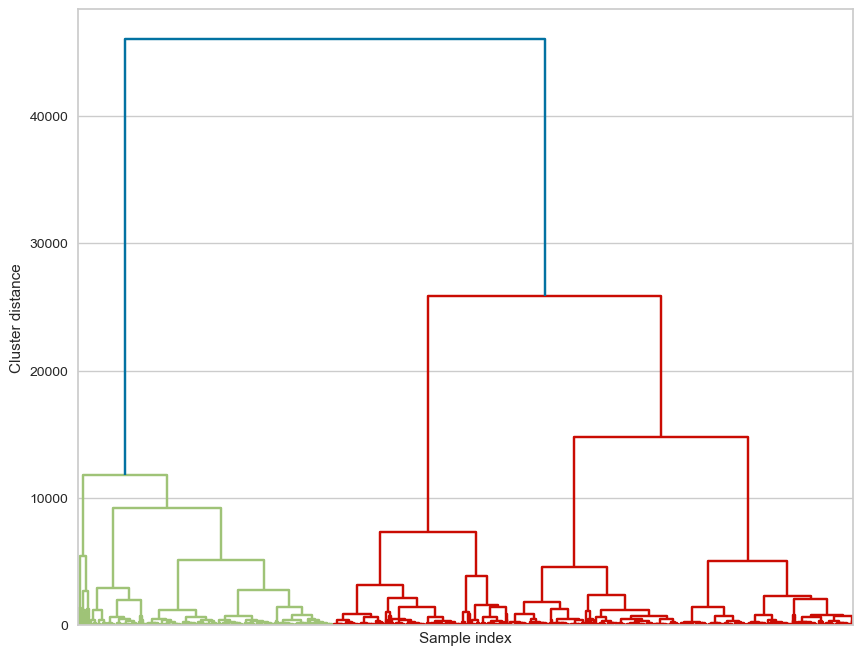

In [151]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(X[:10000],method='ward'), no_labels=True, truncate_mode='level')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

Este método se implementa de la siguiente manera:

In [152]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X2)
print(hc.labels_)

[0 1 1 ... 1 1 0]


Para observar los datos se utiliza:

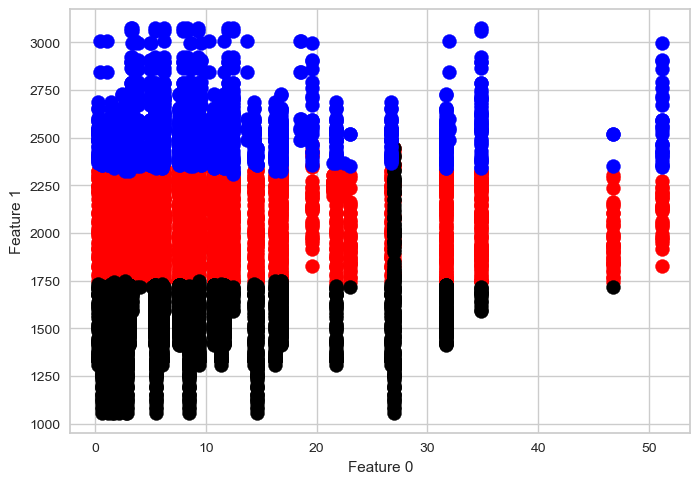

In [153]:
plt.scatter(X2[y_hc==0,fx],X2[y_hc==0,fy],s=100,c='red')
plt.scatter(X2[y_hc==1,fx],X2[y_hc==1,fy],s=100,c='black')
plt.scatter(X2[y_hc==2,fx],X2[y_hc==2,fy],s=100,c='blue')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Otra forma de visualizar los datos de manera mas sencilla es:

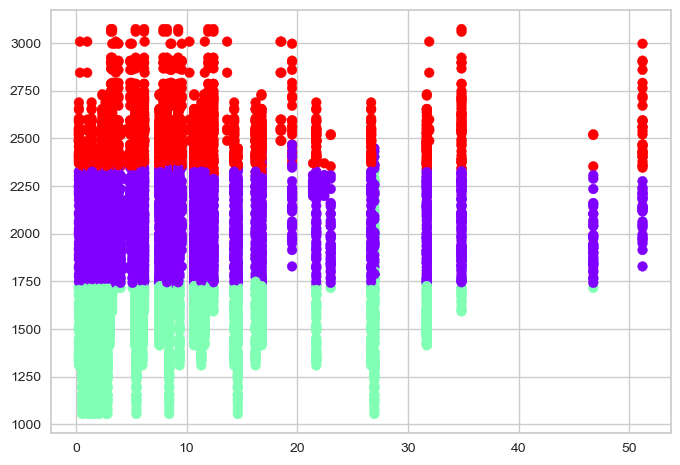

In [154]:
plt.scatter(X2[:,fx],X2[:,fy], c=hc.labels_, cmap='rainbow');

Para gráficamente evaluar la distribución de los datos en cada *cluster* se utiliza:

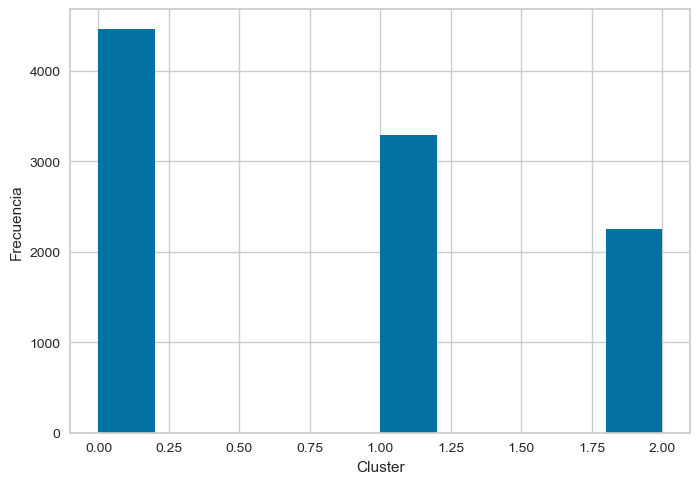

In [155]:
prueba=pd.Series(hc.labels_)
plt.hist(prueba)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia');

Como se mencionó anteriormente uno de los aspectos fundamentales en el método de *KMeans* es definir el número de *clusters* óptimo. Para eso se utilizan los siguientes métodos:

## *Elbow curve*

Este método minimiza las distancias entre todos los pares de puntos en un *cluster*, y se implementa de la siguiente manera utilizando la matriz Z. en este caso solo se revisan lso últimos 10 cluster formados. Es posible que la distancia mayor se presente al inicio y no al final.

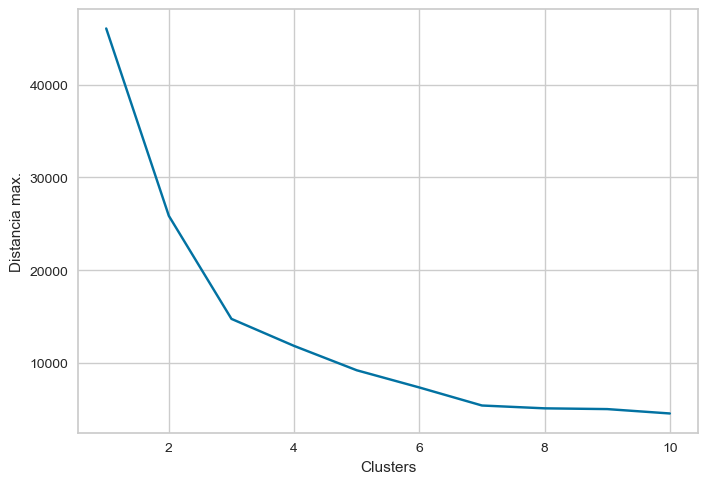

In [156]:
last=Z[-10:,2]
last_rev=last[::-1] #e voltean
idx=np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
plt.xlabel('Clusters')
plt.ylabel('Distancia max.');

También se puede elaborar directamente sin la matriz Z, en función del score.

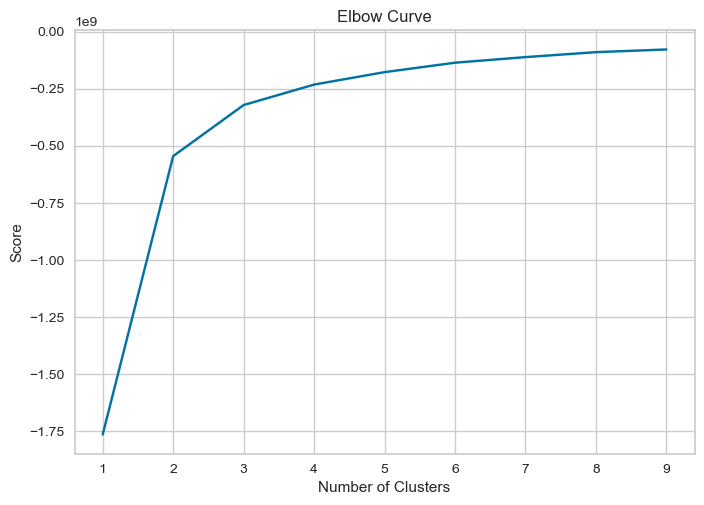

In [157]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

El número de *cluster* óptimo corresponde al quiebre de la curva. En este caso tres.

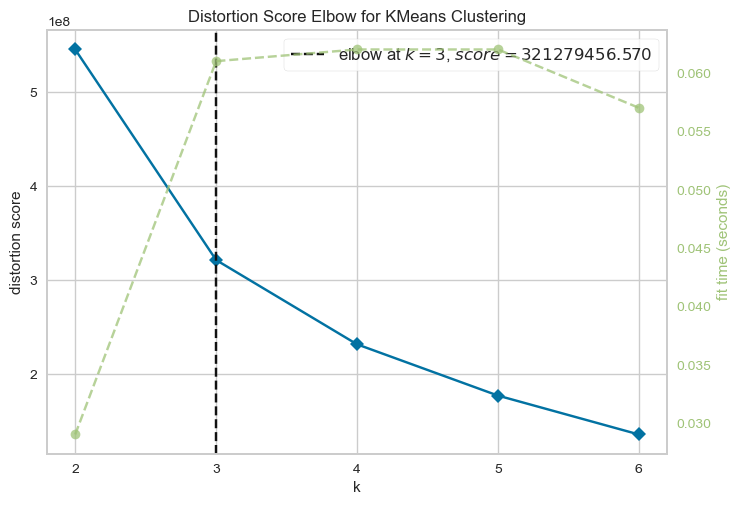

In [158]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X2)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

## Análisis *Silhouette*

Evalua qué tan juntos están los puntos en un *cluster* y qué tan lejos está de otro *cluster*.

### Silhouette score

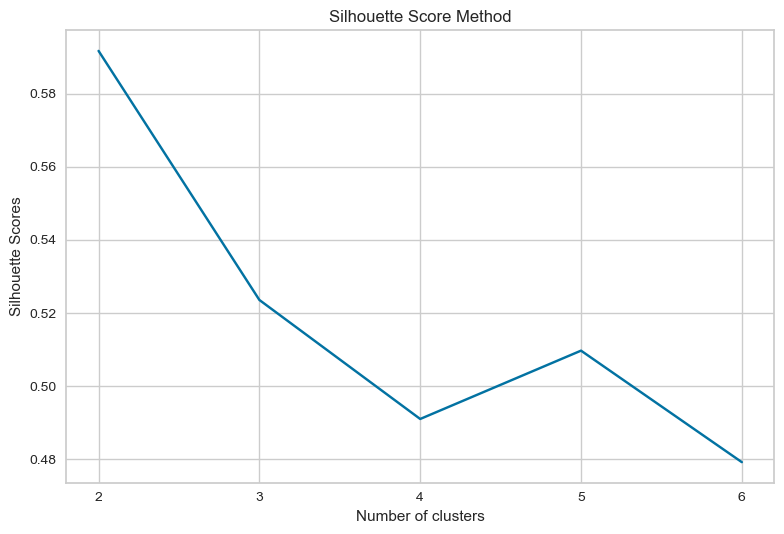

In [159]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(X2)
    silhouette_scores.append(silhouette_score(X2, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

### Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.5917032615237293
For n_clusters = 3 The average silhouette_score is : 0.5235750902165967
For n_clusters = 4 The average silhouette_score is : 0.4909700536343749
For n_clusters = 5 The average silhouette_score is : 0.5097079010515643
For n_clusters = 6 The average silhouette_score is : 0.4793720027704061


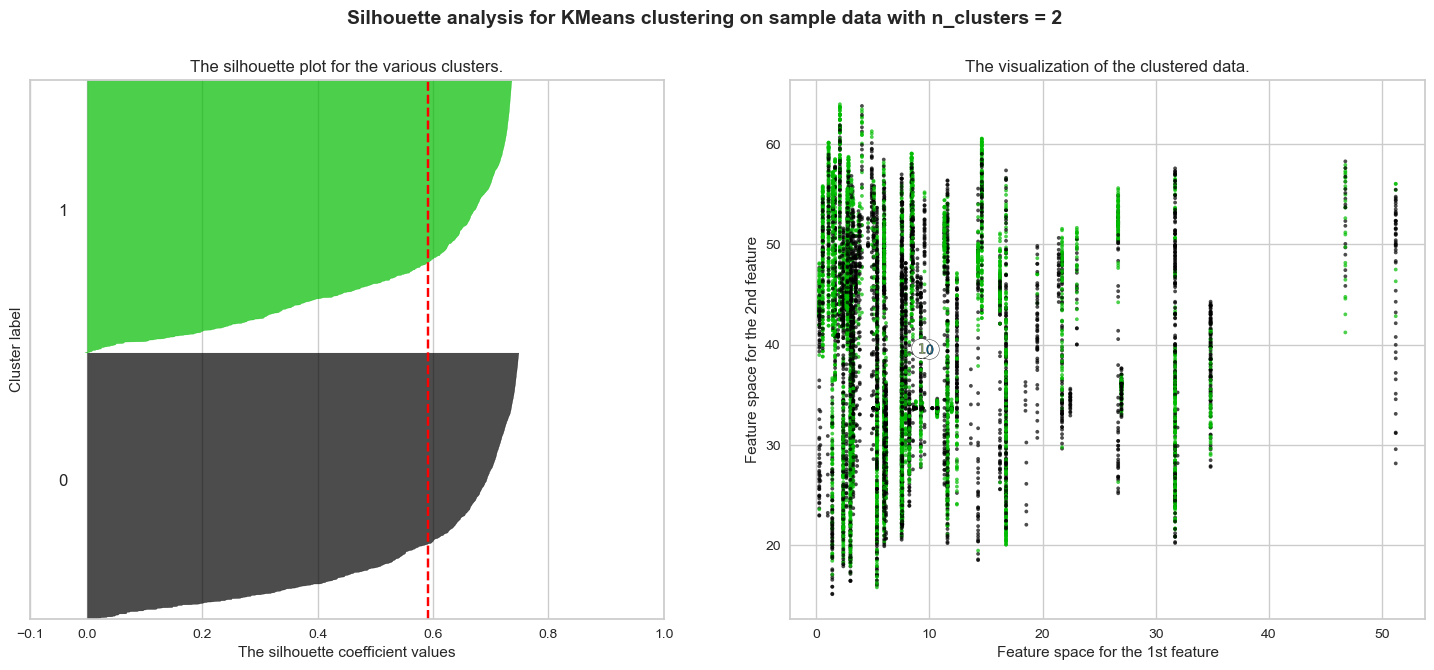

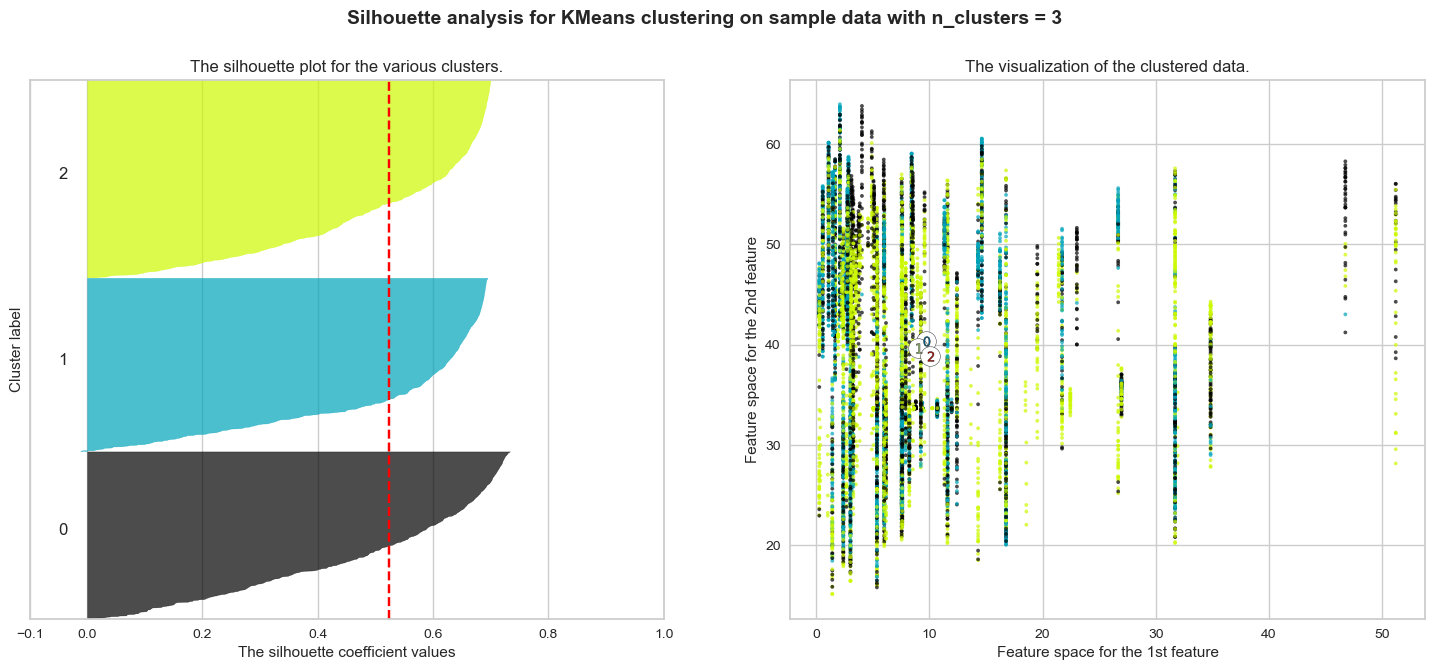

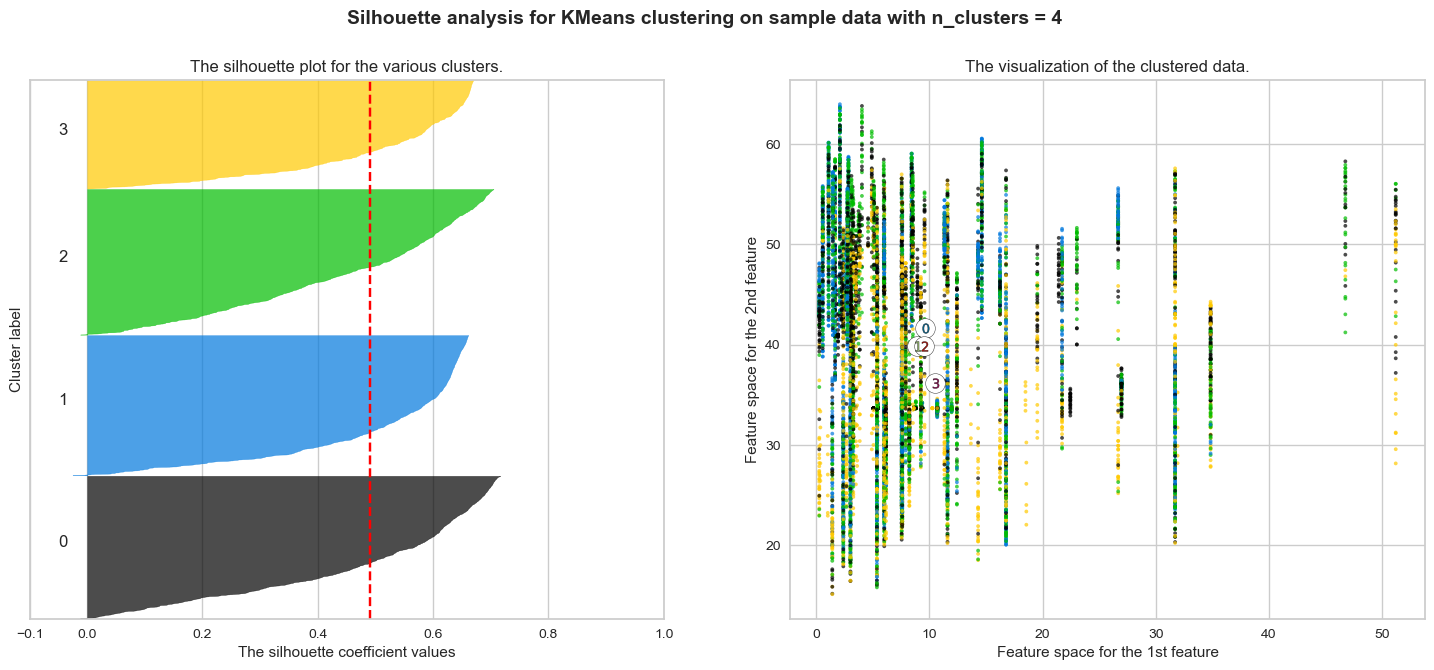

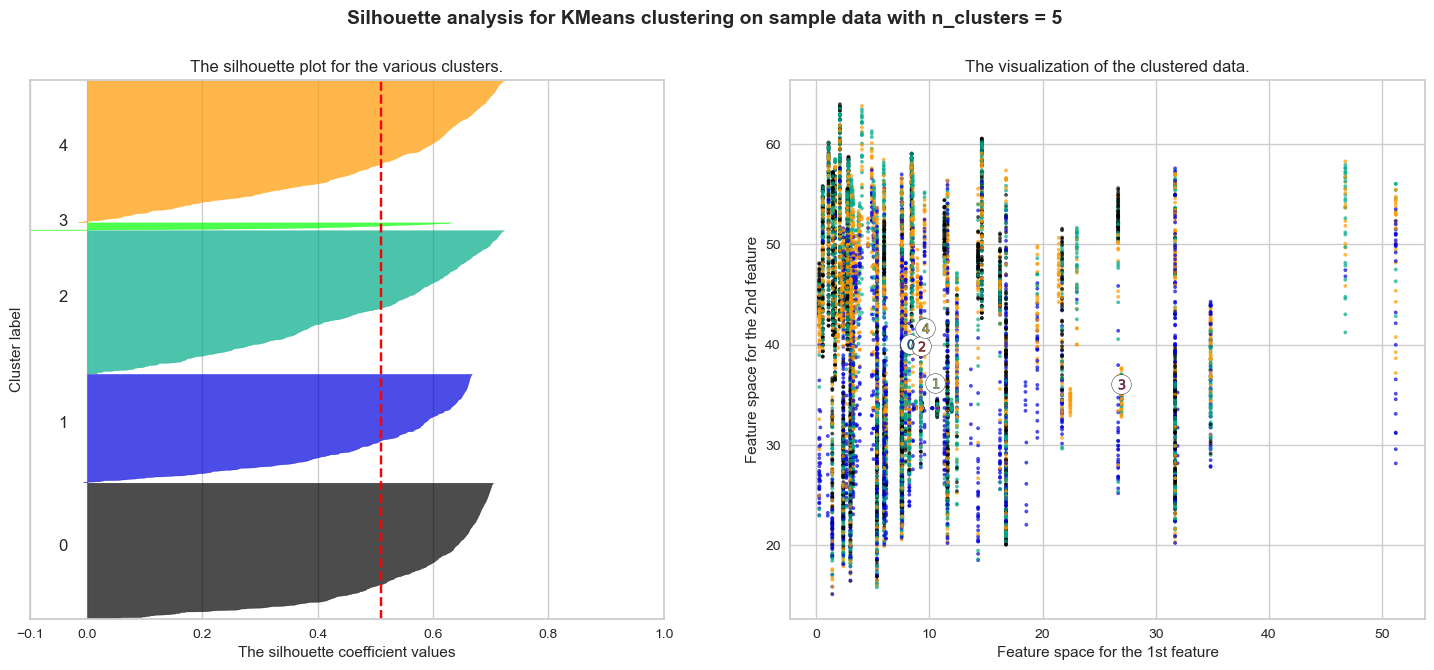

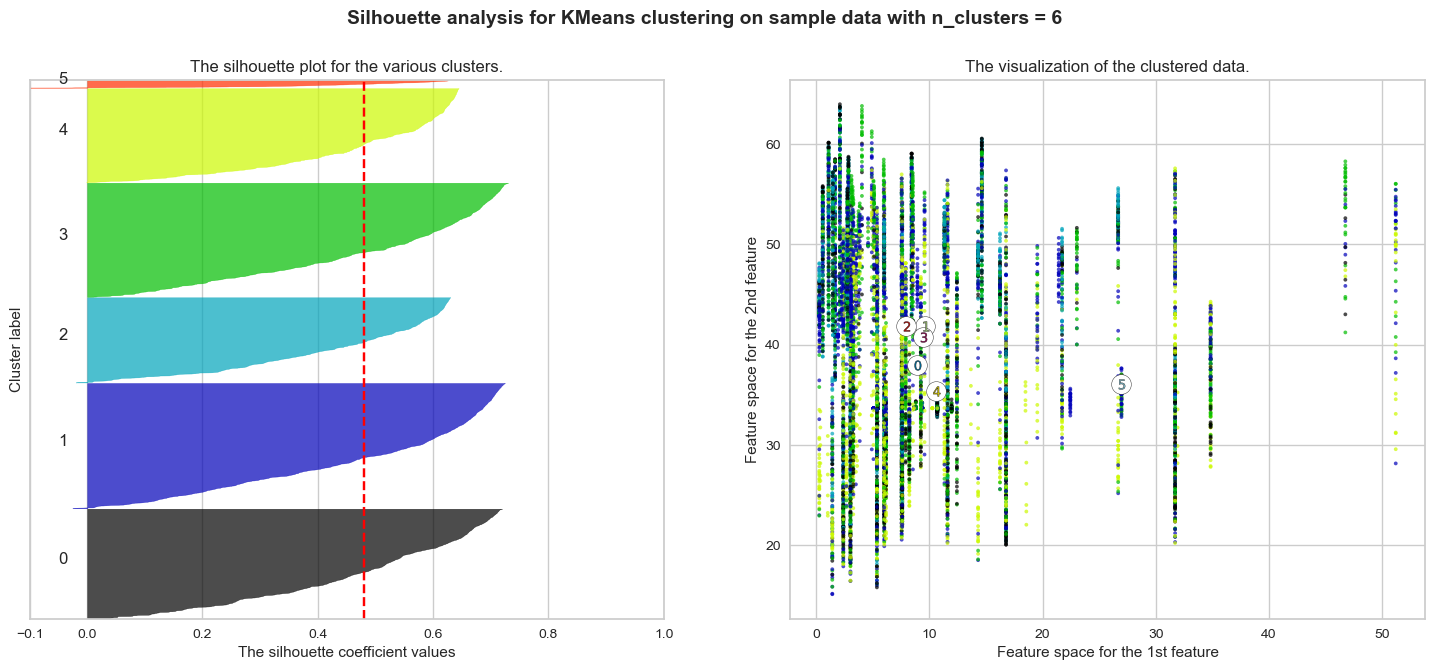

In [161]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X2[:, 0], X2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Otra forma de obtener sólo el valor de Silhoutte es:

In [162]:
from sklearn.metrics.cluster import silhouette_score

result=silhouette_score(X2,y_kmeans)
print('KMeans:',result)
result2=silhouette_score(X2,y_hc)
print('Aglomerative clustering:',result2)

KMeans: 0.5235750902165967
Aglomerative clustering: 0.492034902908556


# 13: Análisis de Componentes Principales (PCA)

El PCA es un método de *machine learning* no supervisado  para reducir dimensionalmente un modelo con una gran cantidad de variables. Para esta reducción permite identificar las varibales que mas le aportan a la varianza del modelo. En este ejemplo vamos a utilizar un conjunto de variables importados desde una tabla de Excel.

Se importan todas las librerías a utilizar.

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Se define la ruta de acceso y se importan los archivos.

In [167]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# X=iris['data']
# y=iris['target']
y1 = y[:10000]
print('X:',np.shape(X1))
print('y:',np.shape(y1))

X: (10000, 7)
y: (10000,)


Se debe escalar los datos antes de aplicar PCA.

In [168]:
scaler=StandardScaler()
ld=scaler.fit(X1)
X_scaled=ld.transform(X1)
X_scaled = pd.DataFrame(X_scaled, columns=X1.keys())

## Cómo calcular PCA

Los vectores propios de una matriz se pueden obtener de tres formas diferentes. La mas común es obteniendo los vectores propios de la matriz de convarianza.

In [169]:
from IPython.display import display, Math, Latex
print('La matriz de convarianza es:')
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

La matriz de convarianza es:


<IPython.core.display.Math object>

Para este método se debe utilizar la matriz normalizada:

In [170]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
             Ppt_ERA5   Humedad  Temperatura   Presion  Elevación     CoorX  \
Ppt_ERA5     1.000100 -0.042868    -0.210687 -0.193785   0.064640 -0.160735   
Humedad     -0.042868  1.000100    -0.075526  0.054311  -0.097497  0.464426   
Temperatura -0.210687 -0.075526     1.000100  0.062532  -0.093863 -0.147008   
Presion     -0.193785  0.054311     0.062532  1.000100   0.070982 -0.250896   
Elevación    0.064640 -0.097497    -0.093863  0.070982   1.000100 -0.315487   
CoorX       -0.160735  0.464426    -0.147008 -0.250896  -0.315487  1.000100   
CoorY       -0.137235  0.256844    -0.091890 -0.167811  -0.273000  0.774649   

                CoorY  
Ppt_ERA5    -0.137235  
Humedad      0.256844  
Temperatura -0.091890  
Presion     -0.167811  
Elevación   -0.273000  
CoorX        0.774649  
CoorY        1.000100  


Numpy tiene una función que calcula directamente la matriz de convarianza de la siguiente forma:

In [171]:
np.cov(X_scaled.T)

array([[ 1.00010001, -0.04286793, -0.21068734, -0.19378548,  0.06463977,
        -0.16073541, -0.13723502],
       [-0.04286793,  1.00010001, -0.07552555,  0.05431073, -0.09749669,
         0.46442595,  0.25684363],
       [-0.21068734, -0.07552555,  1.00010001,  0.06253152, -0.09386259,
        -0.1470082 , -0.09188982],
       [-0.19378548,  0.05431073,  0.06253152,  1.00010001,  0.07098241,
        -0.25089637, -0.16781133],
       [ 0.06463977, -0.09749669, -0.09386259,  0.07098241,  1.00010001,
        -0.31548719, -0.27299968],
       [-0.16073541,  0.46442595, -0.1470082 , -0.25089637, -0.31548719,
         1.00010001,  0.77464889],
       [-0.13723502,  0.25684363, -0.09188982, -0.16781133, -0.27299968,
         0.77464889,  1.00010001]])

Como se puede observar, el resutlado de la matriz de convarianza es igual.  
Finalmente, calculamos los valores propios y vectores propios de dicha matriz de covarianza. Los componentes principales corresponden a los vectores propios.

In [172]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.27014141 0.17210326 1.33305073 0.55901948 1.06811237 0.82772096
 0.77055186]
Vectores propios 
[[-0.12325687  0.08762106  0.65770281 -0.47936426  0.06519313  0.51871324
  -0.2036017 ]
 [ 0.36799696 -0.24340193 -0.05561166  0.32340035 -0.5049058   0.33596713
  -0.57432526]
 [-0.1002889   0.0693156  -0.55324953 -0.31993144  0.47258816  0.07967652
  -0.58907419]
 [-0.1854822   0.1422523  -0.47533556 -0.43027965 -0.56737585  0.33321414
   0.3183224 ]
 [-0.31352784  0.06426939  0.17766536 -0.27113492 -0.43867999 -0.6631829
  -0.40029853]
 [ 0.62151801  0.76349025  0.02668835 -0.11103159 -0.0389743  -0.12413547
  -0.02879411]
 [ 0.56598597 -0.56655958 -0.00530757 -0.54063228  0.04007408 -0.21321698
   0.13889303]]


Tambien es posible utlizar la matriz de correlación para obtener los componentes principales. En este caso corresponden a los vectores propios de la matriz de correlación. La matriz de covarianza de la matriz normalizada es igual a la matriz de correlación.

In [173]:
corr_matrix = np.corrcoef(X.T)
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.24429915 1.40274972 0.19095099 0.63298279 0.70929191 0.89893061
 0.92079483]
Vectores propios 
[[ 0.09354029 -0.60579057  0.02644732 -0.4026639   0.52881678  0.36557556
  -0.21940293]
 [-0.43493605 -0.03648956 -0.25294165  0.5373536   0.43862684 -0.24485038
  -0.45213444]
 [ 0.03282203  0.64118399  0.00788588 -0.32953119  0.64779317 -0.11850771
   0.21324339]
 [ 0.02822141  0.45585481  0.04010261 -0.15435078 -0.21231637  0.4504361
  -0.71971983]
 [ 0.30981397 -0.10303267  0.05850774 -0.35331845 -0.09430426 -0.76031563
  -0.42210109]
 [-0.61911347 -0.03641712  0.75841975 -0.17061415 -0.0407297  -0.09559209
  -0.01630452]
 [-0.56649883 -0.02870263 -0.59584141 -0.51259614 -0.22954929 -0.04741664
   0.07437908]]


Finalmente, tambien se utiliza el método de *Singular Value Decomposition*, donde los componentes principales corresponden a la matriz *U*.

In [174]:
u,s,v = np.linalg.svd(X_scaled.T)
u

array([[-0.12325687,  0.65770281, -0.06519313, -0.51871324,  0.2036017 ,
         0.47936426, -0.08762106],
       [ 0.36799696, -0.05561166,  0.5049058 , -0.33596713,  0.57432526,
        -0.32340035,  0.24340193],
       [-0.1002889 , -0.55324953, -0.47258816, -0.07967652,  0.58907419,
         0.31993144, -0.0693156 ],
       [-0.1854822 , -0.47533556,  0.56737585, -0.33321414, -0.3183224 ,
         0.43027965, -0.1422523 ],
       [-0.31352784,  0.17766536,  0.43867999,  0.6631829 ,  0.40029853,
         0.27113492, -0.06426939],
       [ 0.62151801,  0.02668835,  0.0389743 ,  0.12413547,  0.02879411,
         0.11103159, -0.76349025],
       [ 0.56598597, -0.00530757, -0.04007408,  0.21321698, -0.13889303,
         0.54063228,  0.56655958]])

## PCA con *Scikitlearn*

Se implementa el análisis PCA con la librería sklearn de Python.

In [175]:
n = len(X1.keys())  # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[-0.12325687  0.36799696 -0.1002889  -0.1854822  -0.31352784  0.62151801
   0.56598597]
 [ 0.65770281 -0.05561166 -0.55324953 -0.47533556  0.17766536  0.02668835
  -0.00530757]
 [ 0.06519313 -0.5049058   0.47258816 -0.56737585 -0.43867999 -0.0389743
   0.04007408]
 [ 0.51871324  0.33596713  0.07967652  0.33321414 -0.6631829  -0.12413547
  -0.21321698]
 [-0.2036017  -0.57432526 -0.58907419  0.3183224  -0.40029853 -0.02879411
   0.13889303]
 [ 0.47936426 -0.32340035  0.31993144  0.43027965  0.27113492  0.11103159
   0.54063228]
 [ 0.08762106 -0.24340193  0.0693156   0.1422523   0.06426939  0.76349025
  -0.56655958]]


In [176]:
print(pca.explained_variance_ratio_)

[0.32427348 0.19041678 0.15257222 0.11823403 0.11006783 0.07985194
 0.02458372]


Se puede graficar cuanto aporta a la varianza cada componente generado.

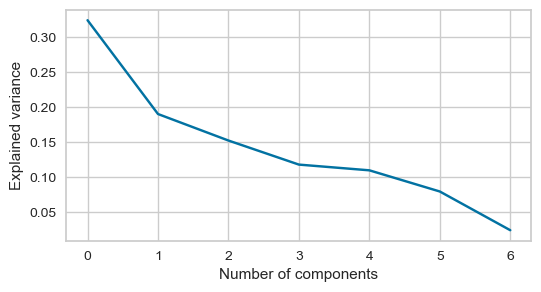

In [177]:
plt.figure(figsize=(6,3))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
#plt.xticks(X1.keys())
plt.show()

Graficamos el acumulado de varianza explicada en las nuevas dimensiones.

In [178]:
X1.keys()

Index(['Ppt_ERA5', 'Humedad', 'Temperatura', 'Presion', 'Elevación', 'CoorX',
       'CoorY'],
      dtype='object')

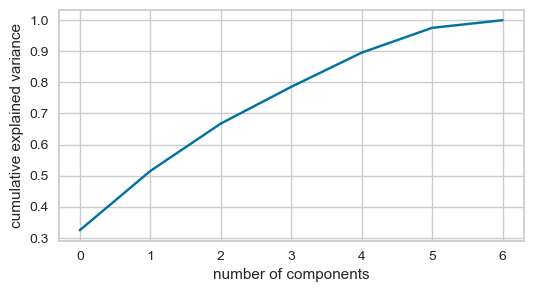

In [179]:
plt.figure(figsize=(6,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Para transformar las observaciones en el nuevo espacio dimencional se utiliza la siguiente función:

In [180]:
pca_samples = pca.transform(X_scaled)

Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de Python. 0,1 denota el componente principal 1 y 2 (PC1 y PC2). Ademas se grafican las observaciones por cada clase en el nuevo espacio dimensional.

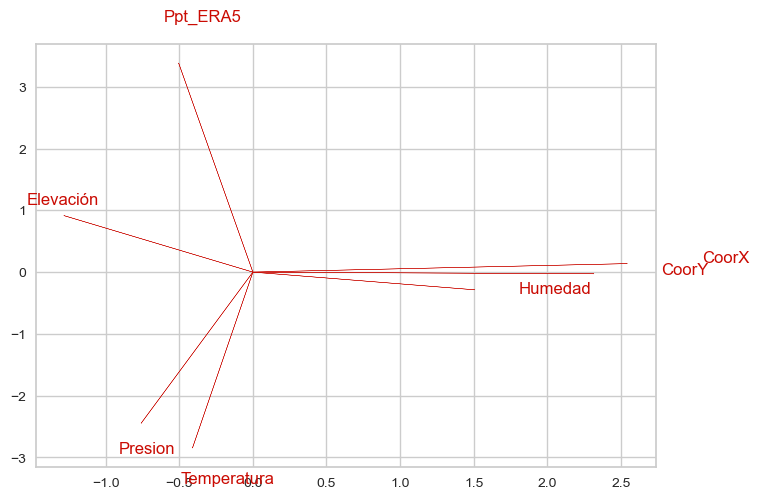

In [185]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] 
ys = pca.transform(X_scaled)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X_scaled.columns.values)[i], color='r') 

# for c, i, iris.target_names in zip("rgb", [0, 1, 2], iris.feature_names):
#    plt.scatter(pca_samples[y1==i,0], pca_samples[y1==i,1], c=c)
# plt.tick_params('y', colors='k', labelsize=12, length=2)
# plt.tick_params('x', colors='k', labelsize= 12, length=2)
# plt.xlabel("Componente Principal 1", fontsize=16)
# plt.ylabel("Componente Principal 2", fontsize=16)
# #plt.legend(iris.feature_names, fontsize=8)
plt.show()

Se puede construir una tabla donde se observe para cada variable su aporte en cada componente. Por lo tanto las variables que mas le aporten a los componentes principales que tienen la mayor varianza, pues serán las mejores variables.

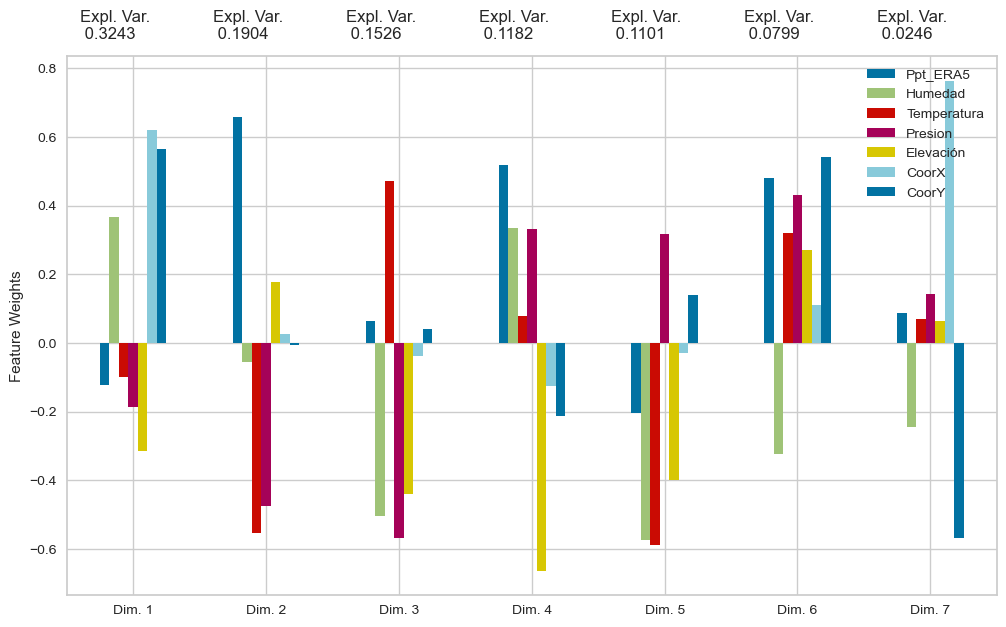

In [183]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (12,7))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

Esta tabla también se resume en esta otra tabla.

In [186]:
pca_results

,Explained Variance,Ppt_ERA5,Humedad,Temperatura,Presion,Elevación,CoorX,CoorY
Dim. 1,0.3243,-0.1233,0.3680,-0.1003,-0.1855,-0.3135,0.6215,0.5660
Dim. 2,0.1904,0.6577,-0.0556,-0.5532,-0.4753,0.1777,0.0267,-0.0053
Dim. 3,0.1526,0.0652,-0.5049,0.4726,-0.5674,-0.4387,-0.0390,0.0401
Dim. 4,0.1182,0.5187,0.3360,0.0797,0.3332,-0.6632,-0.1241,-0.2132
Dim. 5,0.1101,-0.2036,-0.5743,-0.5891,0.3183,-0.4003,-0.0288,0.1389
Dim. 6,0.0799,0.4794,-0.3234,0.3199,0.4303,0.2711,0.1110,0.5406
Dim. 7,0.0246,0.0876,-0.2434,0.0693,0.1423,0.0643,0.7635,-0.5666
